# Monthy Hall paradox:

## Simulation of the method to chose the other door

In this notebook, I decide to run some simulation about the famous *Monty Hall Paradox* to provide a comparison with the theoretical results.
Here is the description of the problem:

Suppose you are on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then propose you the choice to switch your choice to Door No. 2. Is it to your advantage to switch your choice?

In [ ]:
import numpy as np

def generate_scenario(n_doors):
    car = np.random.randint(n_doors)
    choice = np.random.randint(n_doors)
    
    if choice == car:
        if choice == 0:
            presentator = 1
        else:
            presentator = 0
    else:
        presentator = car
    
    return car, choice, presentator

def changing_strategy(car, choice, presentator):
    final_choice = presentator
    return final_choice

def score(car, choice, presentator, final_choice):
    if final_choice == car:
        return 1
    return 0

def simulation(n_samples, n_doors):
    scores = []
    for i in range(n_samples):
        car, choice, presentator = generate_scenario(n_doors)
        final_choice = changing_strategy(car, choice, presentator)
        result = score(car, choice, presentator, final_choice) # changing strategy score
        scores.append(result)
        winning_rate = sum(scores)/len(scores)
    return winning_rate

## Case with three doors

In [37]:
print(f"Winning rate if we chose to change our initial choice: {simulation(n_samples = int(10000), n_doors = 3)}")

Winning rate if we chose to change our initial choice: 0.6744


Out of 10,000 simulations, we see that the winning rate strategy if we chose to switch our choice is equal to 0.67. Thus, we can conclude we should switch our choice to maximize our probability of getting the car. People would assume the probability of getting the right door after the presentator gives us the choice of switching is 1/2.

In fact, at the beginning our probability of getting the right door is 1/3. However, after the presentator opens another door and then gives us the choice of switching, we know for a fact a door for which the car is not behind. 

Let's suppose without loss of generality that the presentator proposes to switch for door No. 2.
Let $X_i$ denote the event that the car is behind door No. $i$.

By Bayes' rule, the probability that the car is behind door No. 1 is:

$P(X_1 | \overline{X_3}) = \frac{P(X_1, \overline{X_3})}{P(\overline{X_3})} = \frac{P(X_1, \overline{X_3})}{1-P(X_3)} = \frac{1/2}{2/3} = 1/3$

Therefore, the probability of getting the car if we switch our choice for door No. 2 is:
$P(X_2 | \overline{X_3}) = 1-P(X_1 | \overline{X_3}) = 2/3$, since $\Omega = X_1 \cup X_2 | X_3$.

Therefore, we must change our choice. It is easier to be convinced by this in the case we have $n$ doors with $n>>1$. Indeed, suppose $n=1,000$ doors. In that case, we choose randomly a door, and the presentator would open 998 doors, leaving 2 remaining closed doors: the one we initially chose and the one the presentator proposes to switch for. It is now clear that we have a very low probability of getting the right door, since it would mean we would have made the right choice from the beginning. In fact, if we opt for the strategy to always keep our initial choice, the probability of getting the car would be equal to $1/n$. The presentator, by opening all the remaining doors but one, focused the uniform probability distribution from the 999 doors to only one door he proposes us the choice to opt for. The probability that the car is beetween the latter door would be equal to $1-1/n$. (the probability that the car is not behind the door we chose). So, for a very large value of $n$, we are almost certain to get the car by switching our choice since $1-1/n \approx 1$.

By Bayes' rule:

$P(X_1 | \overline{X_3}, \overline{X_4}, ..., \overline{X_n}) = \frac{P(X_1, \overline{X_3}, \overline{X_4}, ..., \overline{X_n})}{P(\overline{X_3}, \overline{X_4}, ..., \overline{X_n})} = \frac{P(X_1, \overline{X_3}, \overline{X_4}, ..., \overline{X_n})}{1-P(X_1 \cup X_2)} = \frac{1/2}{2/n} = 1/n$

## Case with $n$ doors

We confirm the latter results by simulating the winning rate score for a given value of the number of doors, which according to the law of large numbers, would converge to the true theoretical probability that we just derived when $n_{samples} \rightarrow +\infty$.

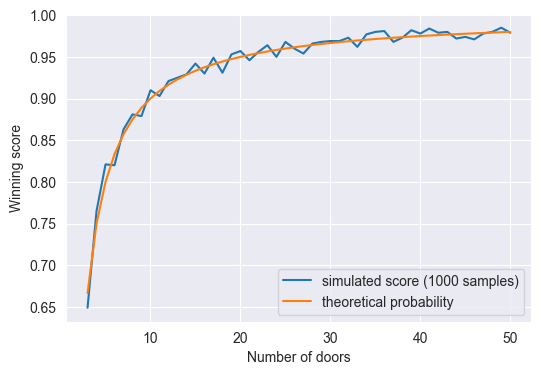

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

x = []
y0 = []
y1 = []
n_samples = 1000
for n_doors in range(3, 51):
    winning_rate = simulation(n_samples, n_doors)
    x.append(n_doors)
    y0.append(winning_rate)
    y1.append(1-1/n_doors)
    
    
sns.set_style("darkgrid")
plt.figure(figsize=(6,4))
plt.xlabel("Number of doors")
plt.ylabel("Winning score")
plt.plot(x, y0, label="simulated score ({} samples)".format(n_samples))
plt.plot(x, y1, label="theoretical probability")
plt.legend()
plt.show()